### Manejos de Outliers.

Ahora que no tenemos valores nulos, vamos a visualizar y manejar outliers. Esto es crucial, porque los outliers pueden influir negativamente en el rendimiento de los modelos de machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# Cargamos los datos.
train_data = pd.read_csv(r'C:\Users\rodri\Desktop\Titanic 2.0\datos\train_sin_nulos.csv')
test_data = pd.read_csv(r'C:\Users\rodri\Desktop\Titanic 2.0\datos\test_sin_nulos.csv')

### Visualizamos outliers con boxplots en los datos de entrenamiento.

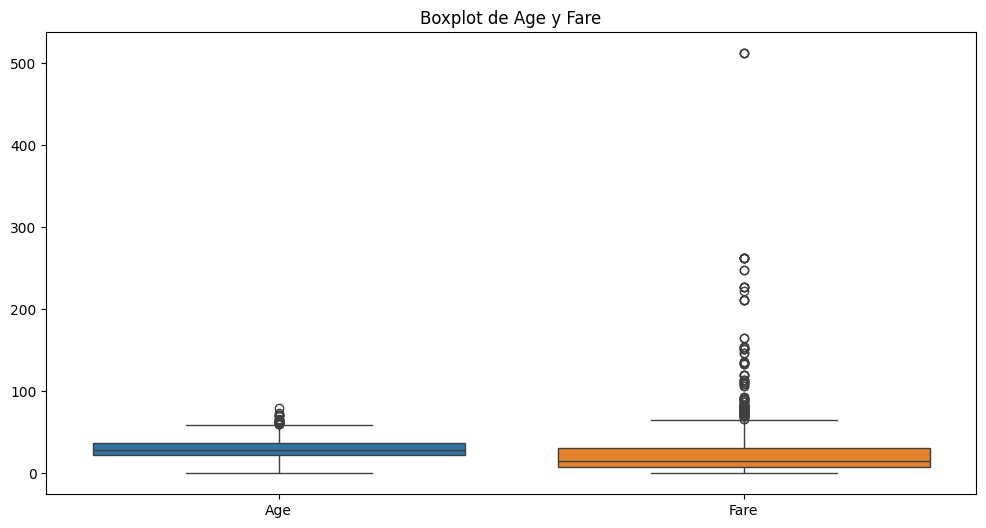

In [3]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = train_data[['Age', 'Fare']])
plt.title('Boxplot de Age y Fare')

plt.show()

## Age
En los analisis anteriores vimos como habian personas mayores de edad en nuestros datos. Los outliers se muestran alrededor de los 70 y 80 años, este rango de edades no es improbable si consideramos que habían personas de diversas edades a bordo. 

Estos valores no parecen absurdos ni erróneos. Son pasajeros ancianos, algo esperado en un barco con más de 2000 personas.

## Fare

En Fare, hay un número considerable de outliers. La mayoría de los outlies están rondando las 100 unidades y llegando a valores extremos cercanos a 500. Esto tiene sentido dado el rango socioeconómico diverso de los pasajeros. Las tarifas altas probablemente corresponden a pasajeros de **primera clase**.

Dado el gran número de outlies en Fare, podría ser problemático para algunos algoritmos sensibles a outlies. Para resolver esto, voy a realizar una transformación logarítmica para reducir la variabilidad extrema sin eliminar datos ya que son muy pocos para un buen entrenamiento. Esto mantendría la información valiosa de los precios de primera clase, pero con un rango más controlado.

---

### Relación entre Age y Fare.

In [4]:
# Calculamos z-scores para 'Age' y 'Fare'.
z_scores = np.abs(stats.zscore(train_data[['Age', 'Fare']]))
umbral = 3 # Umbral para identificar outliers.

In [5]:
# Identificamos outliers.
outliers = (z_scores > umbral).any(axis = 1)
print(f'Número de outliers identificados: {np.sum(outliers)}')

Número de outliers identificados: 25


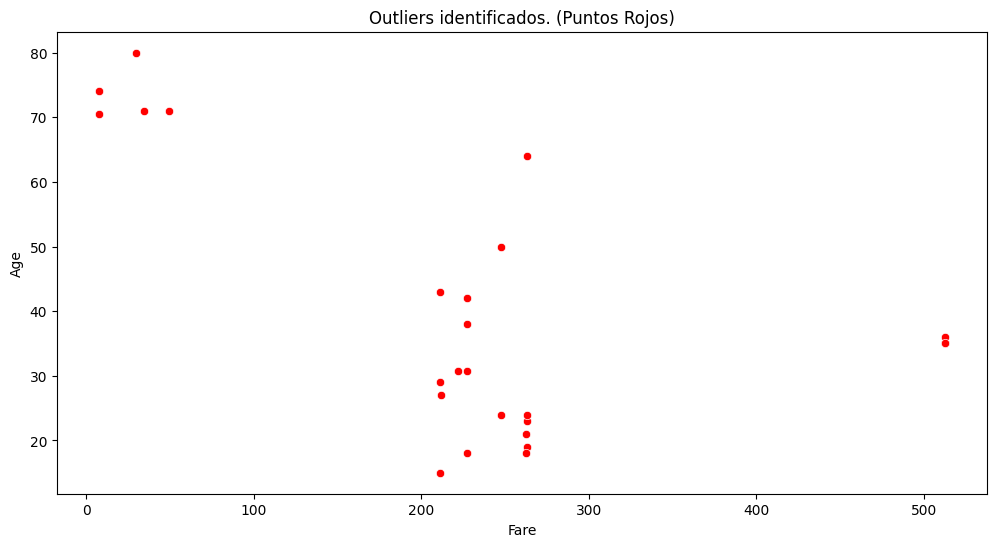

In [6]:
outliers_data = train_data[outliers]
plt.figure(figsize = (12, 6))
sns.scatterplot(data = outliers_data, x = 'Fare', y = 'Age', color = 'red')
plt.title('Outliers identificados. (Puntos Rojos)')

plt.show()

## Mayores con tarifas bajas.

Los puntos en la parte superior izquierda (personas de +70 años con tarifas cercanas a 0) nos muestran que varios pasajeros mayores de edad pagaron tarifas bajas. Este grupo es claramente visible y está detectado como outliers. Podría representar pasajeros de clase baja o media, los cuales pagaron menos por un pasaje de tercera clase. No los trabajaría porque es lógico que personas mayores de tercera clase hayan pagado menos.

## Jovenes con tarifas altas.

Los puntos en la derecha del gráfico (personas entre 20 y 40 años que pagaron más de 200 unidades) también son outlies. Estos son pasajeros más jovenes que pagaron tarifas altas. Estos pasajeros probablemente viajaban en primera clase y tendría sentido en el contexto del Titanic, en donde las personas jóvenes podrían ser parte de familias adineradas.

## Patrón general.

Es evidente que no hay un patrón claro que relacione la edad con el precio del boleto. Esto se debe a la gran diversidad de clases sociales y circustancias personales de los pasajeros. La mayoría de pasajeros se concentran en precios bajo (debido a que muchos viajaban en tercera clase), mientras que otros pasajeros pagaron tarifas altas, especialmente en primera clase.

---

### Transformación logarítmica a Fare.

Esta transformación la vamos a hacer en ambos datasets ya que necesitamos que los datos de entrenamiento y los datos de prueba estén escalados y normalizados de manera similar.

In [7]:
# Aplicamos la transformación logarítmica a la columna 'Fare'.
train_data['Fare_log'] = np.log1p(train_data['Fare']) # Usamos log1p para evitar log(0).
test_data['Fare_log'] = np.log1p(test_data['Fare'])

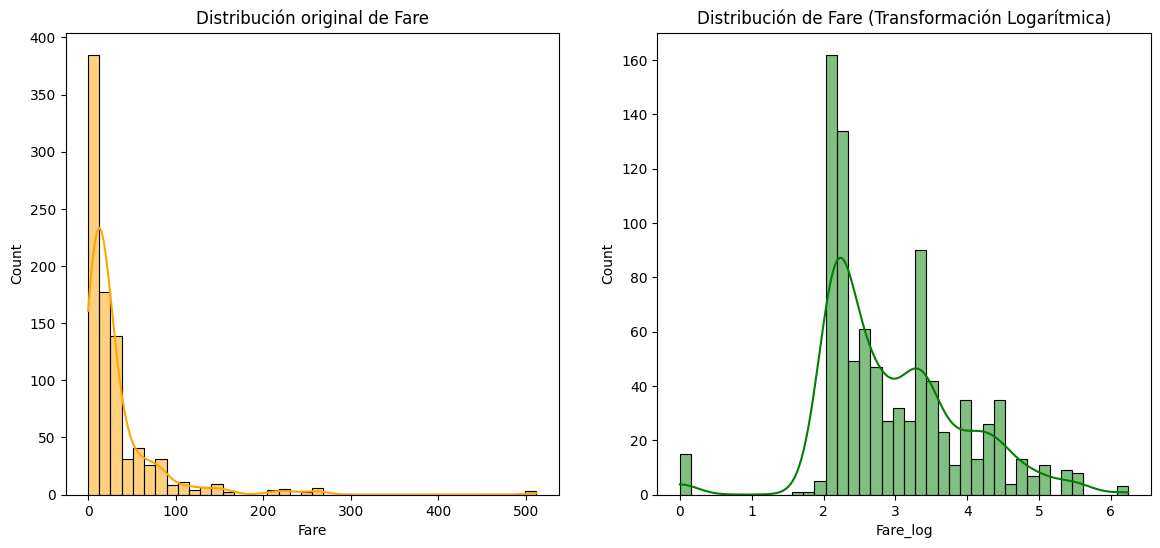

In [8]:
# Visualizamos la distribución de 'Fare' antes y después de la transformación.
plt.figure(figsize = (14, 6))

# Distribución original.
plt.subplot(1, 2, 1)
sns.histplot(train_data['Fare'], bins = 40, kde = True, color = 'orange')
plt.title('Distribución original de Fare')

# Distribución después de la transformación logarítmica.
plt.subplot(1, 2, 2)
sns.histplot(train_data['Fare_log'], bins = 40, kde = True, color = 'green')
plt. title('Distribución de Fare (Transformación Logarítmica)')

plt.show()

### Distribución original.

La distribución original está claramente sesgada a la derecha, con un número significativo de valores concentrados cerca de cero y algunos valores extremos a la derecha (outliers).

### Distribución transformada.

La distribución es mucho más simétrica, con una concentración central más clara y una disperción reducida en los valores extremos.

La transformación logarítmica fue efectiva para reducir el sesgo de la distribución de Fare, lo que puede mejorar el rendimiento de los modelos que vamos a realizar. 

---

### Guardamos los datasets procesados.

In [9]:
train_data.to_csv(r'\Users\rodri\Desktop\Titanic 2.0\datos\train_data.csv', index = False)
test_data.to_csv(r'\Users\rodri\Desktop\Titanic 2.0\datos\test_data.csv', index = False)